0.9196340513411007


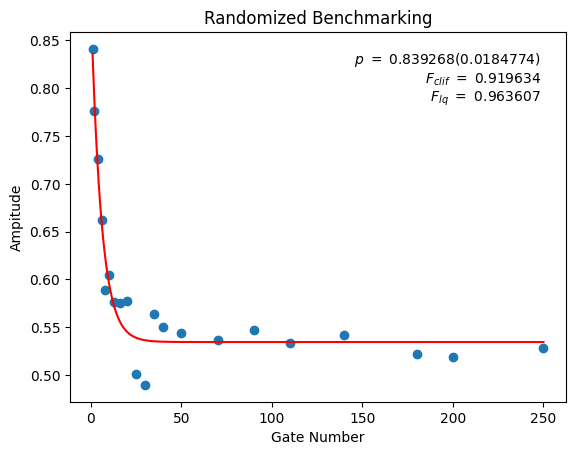

In [14]:
from Fit import FitIndex,RB
import numpy as np
import matplotlib.pyplot as plt
Rb = FitIndex('RB')
file = 'E:\桌面\dyn\动态测试\RB1Q_Randomized_20241031133126.qdat'
x,y,z = np.load(file,allow_pickle=True)['data']
fit = RB((y,z[:,:,0].T.real.mean(axis=1)/1000),p0=[1,0.5,0.99])
plt.figure()
fit.plot()
print(fit.params['Fidelity'])

In [15]:
import os
import numpy as np
import json
with open('RB.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
ans = []
for i in range(21):
    x,y,z = np.load(data['RB']['Q16'][i],allow_pickle=True)['data']
    fit = RB((y,z[:,:,0].T.real.mean(axis=1)/1000),p0=[1,0.5,0.99])
    ans.append(fit.params['Fidelity'])
print(ans)

[0.952820023888989, 0.9550980605759462, 0.9675362479524843, 0.9637170536584829, 0.9734964753497506, 0.9802181780536549, 0.9827091352073358, 0.9868744238333305, 0.9901086778544848, 0.9904698835123891, 0.9907037453067996, 0.9899498436943541, 0.9879227537735474, 0.9852620764840547, 0.983295059444488, 0.9787537814459613, 0.9696730876390565, 0.966611980310337, 0.9603482249538923, 0.9538294057300007, 0.9196340513411007]


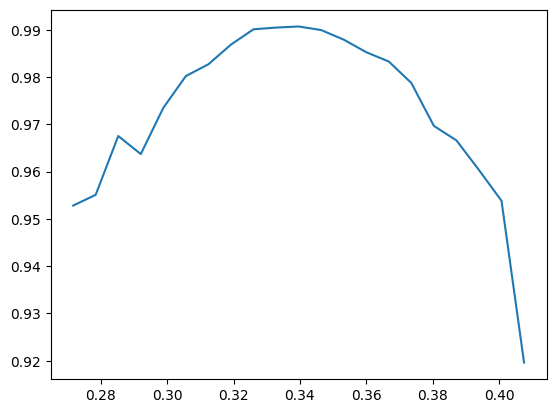

In [17]:
pi_amp = 0.3396
timeList = np.linspace(pi_amp * 0.8, pi_amp*1.2 , 21)
plt.plot(timeList,ans)

In [19]:
from Fit import FitIndex,RB
import numpy as np
import matplotlib.pyplot as plt
Rb = FitIndex('RB')
file = 'E:\桌面\dyn\动态测试\dyn_QST1Q_20241105115812.qdat'
a,b,c = np.load(file,allow_pickle=True)["data"]
print(a)
print(b)
print(c)

[0 1 2]
[0.09   0.0905 0.091  0.0915 0.092  0.0925 0.093  0.0935 0.094  0.0945
 0.095  0.0955 0.096  0.0965 0.097  0.0975 0.098  0.0985 0.099  0.0995
 0.1    0.1005 0.101  0.1015 0.102  0.1025 0.103  0.1035 0.104  0.1045
 0.105  0.1055 0.106  0.1065 0.107  0.1075 0.108  0.1085 0.109  0.1095
 0.11  ]
[[[ 5.57504873e-01+0.j  4.42495127e-01+0.j]
  [ 5.69980507e-01+0.j  4.30019493e-01+0.j]
  [ 5.66081871e-01+0.j  4.33918129e-01+0.j]
  [ 5.56725146e-01+0.j  4.43274854e-01+0.j]
  [ 5.52046784e-01+0.j  4.47953216e-01+0.j]
  [ 5.70760234e-01+0.j  4.29239766e-01+0.j]
  [ 5.80896686e-01+0.j  4.19103314e-01+0.j]
  [ 5.64522417e-01+0.j  4.35477583e-01+0.j]
  [ 5.13060429e-01+0.j  4.86939571e-01+0.j]
  [ 5.73879142e-01+0.j  4.26120858e-01+0.j]
  [ 5.43469786e-01+0.j  4.56530214e-01+0.j]
  [ 5.31773879e-01+0.j  4.68226121e-01+0.j]
  [ 5.61403509e-01+0.j  4.38596491e-01+0.j]
  [ 5.73879142e-01+0.j  4.26120858e-01+0.j]
  [ 5.10721248e-01+0.j  4.89278752e-01+0.j]
  [ 5.47368421e-01+0.j  4.52631579e-01+

In [69]:
from calc_tomo import *
import qutip as qt

file = 'E:\桌面\dyn\动态测试\dyn_QST1Q_20241105115935.qdat'
# file = qst_file
qdataA = np.load(file,allow_pickle=True)
# repeat = 
# print(qdataA['data'])
theta_list = []
phi_list = []
dataA = qdataA['data'][-1]
Xlist = []
ylist = []
zlist = []
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
for i in range(len(dataA[0])):
    dataB = [dataA[0][i].tolist(),dataA[1][i].tolist(),dataA[2][i].tolist()]
    N = 1
    cal_type="prob"
    qstprob = map_inidata_to_qstprob(N=N, qdataA=qdataA, dataA=dataB, cal_type=cal_type)
    rho_calc = qst_calc(N, qstprob, fit_type=None)
    # print(rho_calc)
    Ug = qt.qip.operations.rx(np.pi/2).full()
    fidelity, rhoi = calc_rho_fidelity(N, rho_calc, Ug)
    # print(fidelity)
    # fig,ax, p = calc_state_prob(rho_calc,plot_control =plt)
    x = np.trace(np.dot(rho_calc,sigma_x))
    y = np.trace(np.dot(rho_calc,sigma_y))
    z = np.trace(np.dot(rho_calc,sigma_z))
    Xlist.append(x)
    ylist.append(-y)
    zlist.append(z)
    # print((x,y,z))
print(Xlist)

[(0.06900584795321629+2.220446049250313e-16j), (0.07992202729044845+1.1102230246251565e-16j), (0.019103313840156073+4.440892098500626e-16j), (0.06432748538011707+2.220446049250313e-16j), (0.12202729044834322+3.3306690738754696e-16j), (0.02378167641325558+4.440892098500626e-16j), (0.011306042884990212+1.6653345369377348e-16j), (0.1111111111111114+5.551115123125783e-16j), (0.07524366471734895+2.220446049250313e-16j), (0.04561403508771934+3.3306690738754696e-16j), (0.0955165692007799+4.440892098500626e-16j), (0.07056530214424934+5.551115123125783e-17j), (0.0471734892787526+3.885780586188048e-16j), (0.09551656920077996+3.3306690738754696e-16j), (0.07524366471734874+3.3306690738754696e-16j), (0.05029239766081885+3.3306690738754696e-16j), (0.12358674463937648+2.220446049250313e-16j), (0.0814814814814815+3.3306690738754696e-16j), (0.0050682261208577885+1.6653345369377348e-16j), (0.04405458089668603+3.3306690738754696e-16j), (0.04405458089668642+3.3306690738754696e-16j), (0.1189083820662771+2.

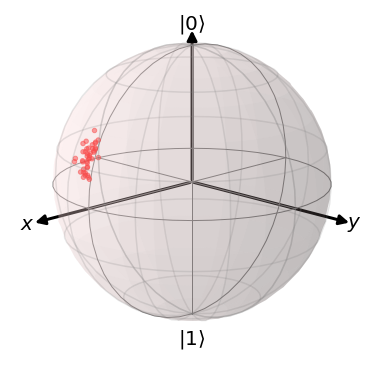

In [42]:
b = qt.Bloch(view=(-45, 15))
b.vector_color = ['k', 'k', 'k']  # 设置向量颜色
b.add_vectors([1.5, 0, 0])  # x 轴
b.add_vectors([0, 1.5, 0])  # y 轴
b.add_vectors([0, 0, 1.12])  # z 轴
b.xlpos = [1.55, -1.55]
b.ylpos = [1.53, -1.53]
b.zlpos = [1.15, -1.2]
b.set_label_convention(convention="original")
b.add_points([Xlist,ylist,zlist],alpha=0.5)
# b.add_points([x,y,z], alpha=1)
# b.add_points([xX_list,yX_list,zX_list],alpha=0.1)
# b.add_points([xX_mean,yX_mean,zX_mean], alpha=1)
# b.point_color = ['#94BB71','g', '#0B4FA9','b', '#F36767','r','#590F4B','#D206E8']
# b.point_size = [2,40,2,40,2,40,2,40]
b.point_color = ['r']
b.point_marker = ['o']
# b.plot_points()bloch
b.point_size = [20]
# b.size([7,7])
b.show()
b.save("len.png")

In [70]:
from scipy.linalg import sqrtm
psi = np.array([[1],[0]])
x_2 = sqrtm(sigma_x)
rho1 = np.dot(np.dot(x_2,psi),np.dot(x_2,psi).T.conjugate())
print(rho1)
x_th = np.trace(np.dot(rho_calc,sigma_x))
y_th = -np.trace(np.dot(rho_calc,sigma_y))
z_th = np.trace(np.dot(rho_calc,sigma_z))
print((x_th,y_th,z_th))

[[5.00000000e-01+1.23259516e-32j 1.23259516e-32+5.00000000e-01j]
 [1.23259516e-32-5.00000000e-01j 5.00000000e-01-1.23259516e-32j]]
((0.107992202729045+3.3306690738754696e-16j), (1.0483430799220277+2.498001805406602e-16j), (-0.10331384015594558-1.5097980760512664e-16j))


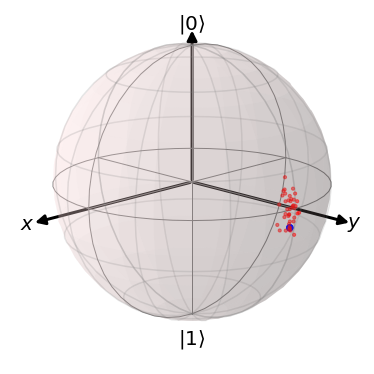

In [71]:
b = qt.Bloch(view=(-45, 15))
b.vector_color = ['k', 'k', 'k']  # 设置向量颜色
b.add_vectors([1.5, 0, 0])  # x 轴
b.add_vectors([0, 1.5, 0])  # y 轴
b.add_vectors([0, 0, 1.12])  # z 轴
b.xlpos = [1.55, -1.55]
b.ylpos = [1.53, -1.53]
b.zlpos = [1.15, -1.2]
b.set_label_convention(convention="original")
b.add_points([Xlist,ylist,zlist],alpha=0.5)
b.add_points([x_th,y_th,z_th], alpha=1)
# b.add_points([xX_list,yX_list,zX_list],alpha=0.1)
# b.add_points([xX_mean,yX_mean,zX_mean], alpha=1)
# b.point_color = ['#94BB71','g', '#0B4FA9','b', '#F36767','r','#590F4B','#D206E8']
# b.point_size = [2,40,2,40,2,40,2,40]
b.point_color = ['r','blue']
b.point_marker = ['o']
# b.plot_points()bloch
b.point_size = [10,40]
# b.size([7,7])
b.show()
b.save("len.svg")